In [ ]:
# Load packages into current runtime
import datetime as dt
import getpass

import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from xarray.plot.utils import label_from_attrs

from harmony import BBox, Client, Collection, Request
from harmony.config import Environment

In [ ]:
!apt-get install -y libgeos-dev
!pip install cartopy


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.12.1-1~jammy0).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 42.5 MB/s eta 0:00:00


In [ ]:
!pip install harmony-py


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.8 MB/s eta 0:00:00
  Created wheel for curlify: filename=curlify-2.2.1-py3-none-any.whl size=2667 sha256=a34d967fe36bb1ed8a6f15f18f79f116938e8e8324f9194f866883d584db63f5
  Stored in directory: /root/.cache/pip/wheels/de/b1/32/218427ea0fc33dda6ec9259a8dbc440c6a04bd2f37c1d67a68
Successfully built curlify
  Attempting uninstall: shapely
    Found existing installation: shapely 2.1.1
    Uninstalling shapely-2.1.1:
      Successfully uninstalled shapely-2.1.1
  Attempting uninstall: python-dotenv
    Found existing installation: python-dotenv 1.1.1
    Uninstalling python-dotenv-1.1.1:
      Successfully uninstalled python-dotenv-1.1.1
  Attempting uninstall: progressbar2
    Found existing installation: progressbar2 4.5.0
    Uninstalling progressbar2-4.5.0:
      Successfully uninstalled progressbar2-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the package

In [ ]:
print("Please provide your Earthdata Login credentials to allow data access")
print("Your credentials will only be passed to Earthdata and will not be exposed in the notebook")
username = input("Username:")

harmony_client = Client(env=Environment.PROD, auth=(username, getpass.getpass()))

Please provide your Earthdata Login credentials to allow data access
Your credentials will only be passed to Earthdata and will not be exposed in the notebook
Username:anshalcodes918
··········


In [ ]:
# "Nitrogen Dioxide total column"
request = Request(
    collection=Collection(id="C2930725014-LARC_CLOUD"),
    "temporal": ["2025-08-01T00:00:00Z", "2025-09-01T23:59:59Z"],,
)
request.is_valid()

SyntaxError: positional argument follows keyword argument (ipython-input-1600341358.py, line 4)

In [ ]:
job_id = harmony_client.submit(request)
print(f"jobID = {job_id}")

harmony_client.wait_for_processing(job_id, show_progress=True)

jobID = 36178a5c-5970-4ec5-9f9a-3a2c2fdaf4a1


 [ Processing: 100% ] |###################################################| [|]


In [ ]:
results = harmony_client.download_all(job_id, directory="/tmp")
all_results_stored = [f.result() for f in results]

print(f"Number of result files: {len(all_results_stored)}")

/tmp/TEMPO_NO2_L2_V03_20250406T215103Z_S012G07.nc
Number of result files: 1


In [ ]:
# Open the data file using the Xarray package.
#   Alternatively, one could use the
#   netCDF4-python (https://unidata.github.io/netcdf4-python/) library.
datatree = xr.open_datatree(all_results_stored[0])
datatree

<xarray.DataTree>
Group: /
│   Dimensions:      (xtrack: 2048, mirror_step: 131)
│   Coordinates:
│     * xtrack       (xtrack) int32 8kB 0 1 2 3 4 5 ... 2043 2044 2045 2046 2047
│     * mirror_step  (mirror_step) int32 524B 788 789 790 791 ... 915 916 917 918
│   Attributes: (12/38)
│       tio_commit:                       bd5e3a3bec43c1970873e2537a09576f5e1d10df
│       product_type:                     NO2
│       processing_level:                 2
│       processing_version:               3
│       sdpc_version:                     TEMPO_SDPC_v4.4.3
│       scan_num:                         12
│       ...                               ...
│       collection_shortname:             TEMPO_NO2_L2
│       collection_version:               1
│       keywords:                         EARTH SCIENCE>ATMOSPHERE>AIR QUALITY>NI...
│       summary:                          Nitrogen dioxide Level 2 files provide ...
│       coremetadata:                     \nGROUP                  = INVENTORYMET...
│       history:                          2025-04-07T02:04:27Z:/tempo/nas0/sdpc_s...
├── Group: /product
│       Dimensions:                                  (mirror_step: 131, xtrack: 2048)
│       Data variables:
│           main_data_quality_flag                   (mirror_step, xtrack) float32 1MB ...
│           vertical_column_troposphere              (mirror_step, xtrack) float64 2MB ...
│           vertical_column_stratosphere             (mirror_step, xtrack) float64 2MB ...
│           vertical_column_troposphere_uncertainty  (mirror_step, xtrack) float64 2MB ...
├── Group: /geolocation
│       Dimensions:                 (mirror_step: 131, xtrack: 2048, corner: 4)
│       Coordinates:
│           time                    (mirror_step) datetime64[ns] 1kB ...
│           latitude                (mirror_step, xtrack) float32 1MB ...
│           longitude               (mirror_step, xtrack) float32 1MB ...
│       Dimensions without coordinates: corner
│       Data variables:
│           latitude_bounds         (mirror_step, xtrack, corner) float32 4MB ...
│           longitude_bounds        (mirror_step, xtrack, corner) float32 4MB ...
│           solar_zenith_angle      (mirror_step, xtrack) float32 1MB ...
│           solar_azimuth_angle     (mirror_step, xtrack) float32 1MB ...
│           viewing_zenith_angle    (mirror_step, xtrack) float32 1MB ...
│           viewing_azimuth_angle   (mirror_step, xtrack) float32 1MB ...
│           relative_azimuth_angle  (mirror_step, xtrack) float32 1MB ...
├── Group: /support_data
│       Dimensions:                            (mirror_step: 131, xtrack: 2048,
│                                               swt_level: 72)
│       Dimensions without coordinates: swt_level
│       Data variables: (12/20)
│           vertical_column_total              (mirror_step, xtrack) float64 2MB ...
│           vertical_column_total_uncertainty  (mirror_step, xtrack) float64 2MB ...
│           fitted_slant_column                (mirror_step, xtrack) float64 2MB ...
│           fitted_slant_column_uncertainty    (mirror_step, xtrack) float64 2MB ...
│           snow_ice_fraction                  (mirror_step, xtrack) float32 1MB ...
│           terrain_height                     (mirror_step, xtrack) float32 1MB ...
│           ...                                 ...
│           amf_diagnostic_flag                (mirror_step, xtrack) float32 1MB ...
│           eff_cloud_fraction                 (mirror_step, xtrack) float32 1MB ...
│           amf_cloud_fraction                 (mirror_step, xtrack) float32 1MB ...
│           amf_cloud_pressure                 (mirror_step, xtrack) float32 1MB ...
│           amf_troposphere                    (mirror_step, xtrack) float32 1MB ...
│           amf_stratosphere                   (mirror_step, xtrack) float32 1MB ...
└── Group: /qa_statistics
        Dimensions:               (mirror_step: 131, xtrack: 2048)
        Data variables:
            fit_rms_resi

In [ ]:
product_variable_name = "product/vertical_column_troposphere"
da = datatree[product_variable_name]
da

<xarray.DataArray 'vertical_column_troposphere' (mirror_step: 131, xtrack: 2048)> Size: 2MB
[268288 values with dtype=float64]
Coordinates:
  * xtrack       (xtrack) int32 8kB 0 1 2 3 4 5 ... 2043 2044 2045 2046 2047
  * mirror_step  (mirror_step) int32 524B 788 789 790 791 ... 915 916 917 918
Attributes:
    long_name:  troposphere nitrogen dioxide vertical column
    units:      molecules/cm^2

In [ ]:
data_proj = ccrs.PlateCarree()


def make_nice_map(axis):
    axis.add_feature(cfeature.STATES, color="gray", lw=0.1)
    axis.coastlines(resolution="50m", color="gray", linewidth=0.5)

    axis.set_extent([-150, -40, 14, 65], crs=data_proj)
    grid = axis.gridlines(draw_labels=["left", "bottom"], dms=True)
    grid.xformatter = LONGITUDE_FORMATTER
    grid.yformatter = LATITUDE_FORMATTER

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


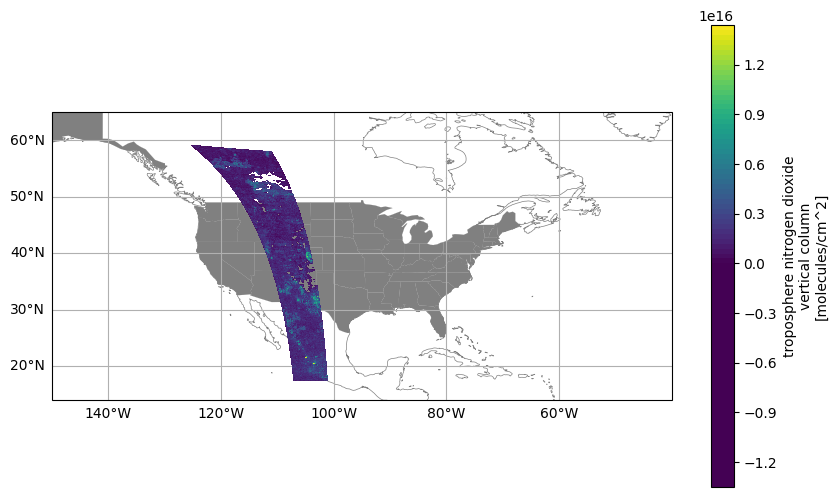

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": data_proj})

make_nice_map(ax)

contour_handle = ax.contourf(
    datatree["geolocation/longitude"],
    datatree["geolocation/latitude"],
    da.where(datatree["product/main_data_quality_flag"] == 0),
    levels=100,
    vmin=0,
    zorder=2,
)

cb = plt.colorbar(contour_handle)
cb.set_label(label_from_attrs(da))

plt.show()

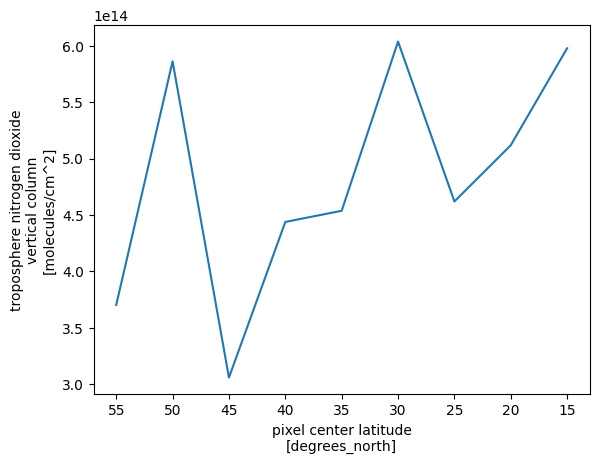

In [ ]:
# Define two-degree wide latitude bins.
lat_bins = np.arange(15, 61, 5)

# Define a label for each bin corresponding to the central latitude.
lat_centers = np.arange(15, 60, 5)

# Group according to those bins and take the mean.
product_lat_mean = da.groupby_bins(
    datatree["geolocation/latitude"], lat_bins, labels=lat_centers
).mean(dim=xr.ALL_DIMS)

product_lat_mean.plot()
plt.gca().invert_xaxis()

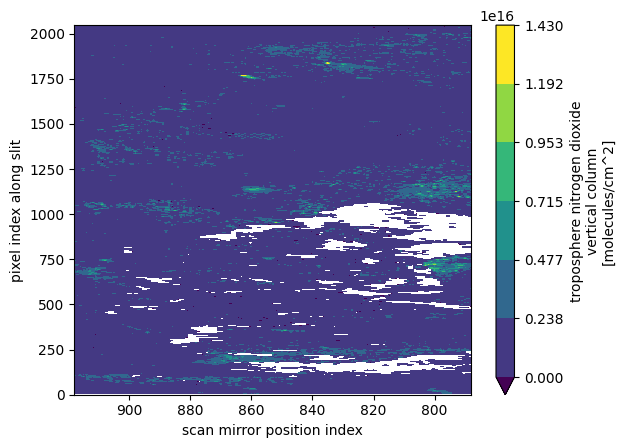

In [ ]:
da.where(datatree["product/main_data_quality_flag"] == 0).plot.contourf(
    x="mirror_step", y="xtrack", vmin=0
)

plt.gca().invert_xaxis()
plt.show()

In [ ]:
# TEMPO Formaldehyde
request = Request(
    collection=Collection(id="C2930730944-LARC_CLOUD"),
    granule_name=["TEMPO_HCHO_L2_V03_20231230T145736Z_S003G08.nc"],
    variables=["product/vertical_column"],
)

job_id = harmony_client.submit(request)
print(f"jobID = {job_id}")
harmony_client.wait_for_processing(job_id, show_progress=True)

# Download the resulting files
results = harmony_client.download_all(job_id, directory="/tmp", overwrite=True)
all_results_stored = [f.result() for f in results]
print(f"Number of result files: {len(all_results_stored)}")

jobID = 8409d5a5-5129-4425-841d-5cb1cbd2a2dc


 [ Processing: 100% ] |###################################################| [|]


/tmp/108361789_TEMPO_HCHO_L2_V03_20231230T145736Z_S003G08_regridded_filtered_product_vertical_column_reformatted.png
/tmp/108361789_TEMPO_HCHO_L2_V03_20231230T145736Z_S003G08_regridded_filtered_product_vertical_column_reformatted.pgw
/tmp/108361789_TEMPO_HCHO_L2_V03_20231230T145736Z_S003G08_regridded_filtered_product_vertical_column_reformatted.png.aux.xml
Number of result files: 3


In [ ]:
# Open the data file.
datatree = xr.open_datatree(all_results_stored[0])
datatree

NameError: name 'all_results_stored' is not defined

In [ ]:
!pip install netCDF4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.3 MB/s eta 0:00:00


In [ ]:
!pip install h5netcdf h5py


In [ ]:
!pip install cfgrib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 83.1 MB/s eta 0:00:00


In [ ]:
import xarray as xr

datatree = xr.open_dataset(all_results_stored[0])  # use open_dataset instead of open_datatree
datatree


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/file1.nc', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# @title
# A clean-up step to ensure there isn't a clash between newly downloaded granules
for rf in all_results_stored:
    !rm {rf}

rm: cannot remove '/content/file1.nc': No such file or directory
rm: cannot remove '/content/file2.nc': No such file or directory


In [ ]:
all_results_stored = ["/content/file1.nc", "/content/file2.nc"]


In [ ]:
request = Request(
    collection=Collection(id="C2930730944-LARC_CLOUD"),
    # Note there is not a granule specified!
    temporal={
        "start": dt.datetime(2023, 12, 30, 22, 30, 0),
        "stop": dt.datetime(2023, 12, 30, 22, 45, 0),
    },
)

job_id = harmony_client.submit(request)

print(f"jobID = {job_id}")
harmony_client.wait_for_processing(job_id, show_progress=True)

# Download the resulting files
results = harmony_client.download_all(job_id, directory="/tmp", overwrite=True)
all_results_stored = [f.result() for f in results]
print(f"Number of result files: {len(all_results_stored)}")

NameError: name 'Request' is not defined

In [ ]:
from harmony import BBox, Request, Collection
import datetime as dt
request = Request(
    collection=Collection(id="C2930730944-LARC_CLOUD"),
    temporal={
        "start": dt.datetime(2023, 12, 30, 22, 30, 0),
        "stop": dt.datetime(2023, 12, 30, 22, 45, 0),
    },
)

job_id = harmony_client.submit(request)

print(f"jobID = {job_id}")
harmony_client.wait_for_processing(job_id, show_progress=True)

# Download the resulting files
results = harmony_client.download_all(job_id, directory="/tmp", overwrite=True)
all_results_stored = [f.result() for f in results]
print(f"Number of result files: {len(all_results_stored)}")


NameError: name 'harmony_client' is not defined

In [ ]:
!pip install harmony-py


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.8 MB/s eta 0:00:00
  Created wheel for curlify: filename=curlify-2.2.1-py3-none-any.whl size=2667 sha256=5d4699d87f7a9db241775901b3d5200c5dfd0b31b5899116ba0ae6a29b6137bb
  Stored in directory: /root/.cache/pip/wheels/de/b1/32/218427ea0fc33dda6ec9259a8dbc440c6a04bd2f37c1d67a68
Successfully built curlify
  Attempting uninstall: shapely
    Found existing installation: shapely 2.1.1
    Uninstalling shapely-2.1.1:
      Successfully uninstalled shapely-2.1.1
  Attempting uninstall: python-dotenv
    Found existing installation: python-dotenv 1.1.1
    Uninstalling python-dotenv-1.1.1:
      Successfully uninstalled python-dotenv-1.1.1
  Attempting uninstall: progressbar2
    Found existing installation: progressbar2 4.5.0
    Uninstalling progressbar2-4.5.0:
      Successfully uninstalled progressbar2-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the package

In [ ]:
!pip install harmony-py

import datetime as dt
from harmony import Request, Collection
from harmony import Client
from harmony.config import Environment
import getpass

print("Please provide your Earthdata Login credentials to allow data access")
print("Your credentials will only be passed to Earthdata and will not be exposed in the notebook")
username = input("Username:")

harmony_client = Client(env=Environment.PROD, auth=(username, getpass.getpass()))


# Create a request
request = Request(
    collection=Collection(id="C2930730944-LARC_CLOUD"),
    temporal={
        "start": dt.datetime(2023, 12, 30, 22, 30, 0),
        "stop": dt.datetime(2023, 12, 30, 22, 45, 0),
    },
)

# Submit the job
job_id = harmony_client.submit(request)
print(f"jobID = {job_id}")

# Wait for job completion
harmony_client.wait_for_processing(job_id, show_progress=True)

# Download results
results = harmony_client.download_all(job_id, directory="/tmp", overwrite=True)
all_results_stored = [f.result() for f in results]
print(f"Number of result files: {len(all_results_stored)}")

# Open with xarray
import xarray as xr
ds = xr.open_dataset(all_results_stored[0])
ds

Please provide your Earthdata Login credentials to allow data access
Your credentials will only be passed to Earthdata and will not be exposed in the notebook
Username:anshalcodes918
··········
jobID = 96054000-f82e-4f6b-97f4-b33e1e49999f


 [ Processing: 100% ] |###################################################| [|]


/tmp/108490882_TEMPO_HCHO_L2_V03_20231230T222426Z_S010G03_subsetted.nc
/tmp/108490883_TEMPO_HCHO_L2_V03_20231230T223104Z_S010G04_subsetted.nc
/tmp/108490885_TEMPO_HCHO_L2_V03_20231230T224418Z_S010G06_subsetted.nc
/tmp/108490884_TEMPO_HCHO_L2_V03_20231230T223741Z_S010G05_subsetted.nc
Number of result files: 4


<xarray.Dataset> Size: 8kB
Dimensions:      (xtrack: 2048, mirror_step: 27)
Coordinates:
  * xtrack       (xtrack) int32 8kB 0 1 2 3 4 5 ... 2043 2044 2045 2046 2047
  * mirror_step  (mirror_step) int32 108B 367 368 369 370 ... 390 391 392 393
Data variables:
    *empty*
Attributes: (12/39)
    tio_commit:                       040d27c76f5040d777912886b53b0f3a5cbb3e67
    product_type:                     HCHO
    processing_level:                 2
    processing_version:               3
    sdpc_version:                     TEMPO_SDPC_v4.4.2
    scan_num:                         10
    ...                               ...
    collection_version:               1
    keywords:                         EARTH SCIENCE>ATMOSPHERE>AIR QUALITY>VO...
    summary:                          Formaldehyde Level 2 files provide trac...
    coremetadata:                     \nGROUP                  = INVENTORYMET...
    history:                          2024-08-06T00:36:10Z:/tempo/nas0/sdpc_s...
    history_json:                     [{"date_time": "2025-09-03T05:30:11.044...

In [ ]:
# Open the data files
datatree_dict = dict()
for r in sorted(all_results_stored):
    datatree_dict[r] = xr.open_datatree(r)

    print(
        f"Time range: {datatree_dict[r]['geolocation/time'].values.min()} - "
        f"{datatree_dict[r]['geolocation/time'].values.max()}"
    )

Time range: 2023-12-30T22:30:00.279620864 - 2023-12-30T22:31:19.139312896
Time range: 2023-12-30T22:31:22.172382976 - 2023-12-30T22:37:56.470801152
Time range: 2023-12-30T22:37:59.503866880 - 2023-12-30T22:44:33.802316800
Time range: 2023-12-30T22:44:36.835376128 - 2023-12-30T22:44:58.066825984


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize each data file
fig, axs = plt.subplots(
    nrows=len(datatree_dict),
    sharex=True,
    figsize=(7, 10),
    gridspec_kw=dict(hspace=0.25),
    subplot_kw={"projection": data_proj},
)

for i, (key, tree) in enumerate(datatree_dict.items()):
    Var = tree["product/vertical_column"]

    if np.count_nonzero(~np.isnan(Var.values)) > 0:
        ax = axs[i]
        make_nice_map(ax)

        contour_handle = ax.contourf(
            tree["geolocation/longitude"],
            tree["geolocation/latitude"],
            Var,
            levels=100,
            vmin=0,
            zorder=2,
        )

        ax.set_title(key, fontsize=8)

plt.show()


NameError: name 'data_proj' is not defined

In [ ]:
!pip install cartopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.3 MB/s eta 0:00:00


In [ ]:
import cartopy.crs as ccrs

# Define projection (PlateCarree is common for lat/lon data)
data_proj = ccrs.PlateCarree()


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


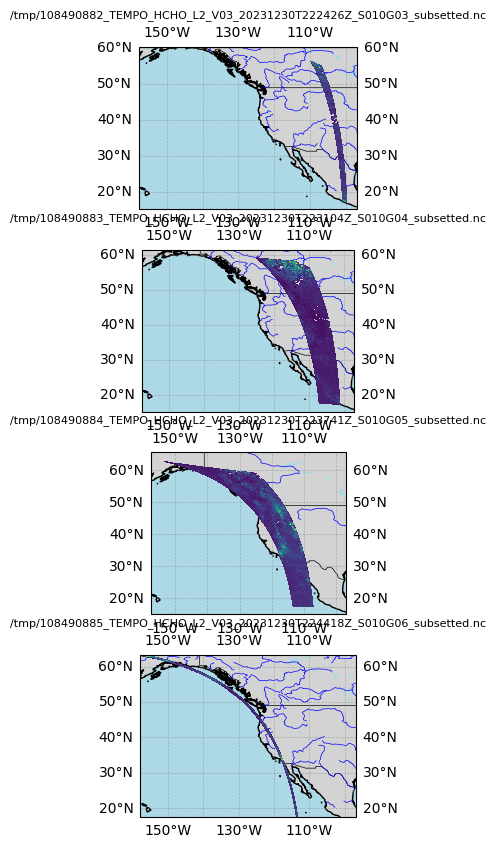

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Helper function to make map look nice
def make_nice_map(ax):
    ax.coastlines(resolution="50m", color="black", linewidth=1)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor="lightgray")
    ax.add_feature(cfeature.OCEAN, facecolor="lightblue")
    ax.add_feature(cfeature.LAKES, facecolor="lightblue")
    ax.add_feature(cfeature.RIVERS, edgecolor="blue", linewidth=0.5)
    ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")

# Define projection (PlateCarree is most common for TEMPO data)
data_proj = ccrs.PlateCarree()

# Visualize each data file
fig, axs = plt.subplots(
    nrows=len(datatree_dict),
    sharex=True,
    figsize=(7, 10),
    gridspec_kw=dict(hspace=0.25),
    subplot_kw={"projection": data_proj},
)

for i, (key, tree) in enumerate(datatree_dict.items()):
    Var = tree["product/vertical_column"]

    if np.count_nonzero(~np.isnan(Var.values)) > 0:
        ax = axs[i]
        make_nice_map(ax)

        contour_handle = ax.contourf(
            tree["geolocation/longitude"],
            tree["geolocation/latitude"],
            Var,
            levels=100,
            vmin=0,
            zorder=2,
            transform=ccrs.PlateCarree(),  # Important for correct projection
        )

        ax.set_title(key, fontsize=8)

plt.show()


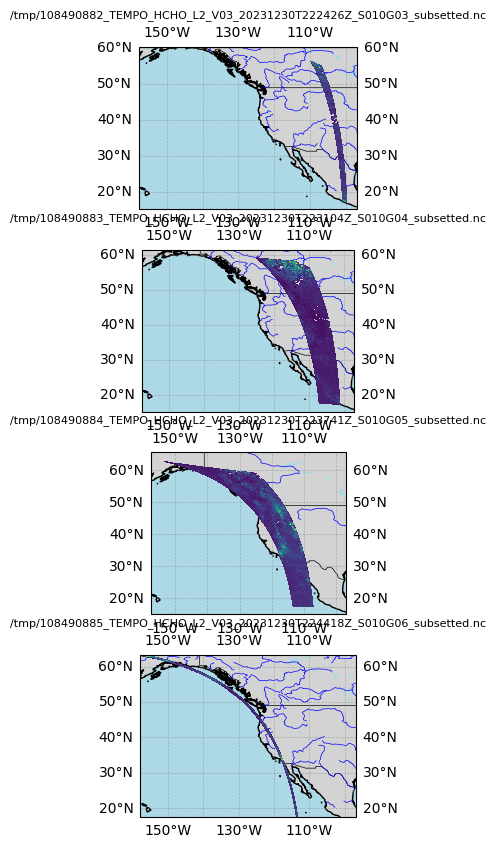

In [ ]:
# Visualize each data file
fig, axs = plt.subplots(
    nrows=len(datatree_dict),
    sharex=True,
    figsize=(7, 10),
    gridspec_kw=dict(hspace=0.25),
    subplot_kw={"projection": data_proj},
)

for i, (key, tree) in enumerate(datatree_dict.items()):
    Var = tree["product/vertical_column"]

    if np.count_nonzero(~np.isnan(Var.values)) > 0:
        ax = axs[i]
        make_nice_map(ax)

        contour_handle = ax.contourf(
            tree["geolocation/longitude"],
            tree["geolocation/latitude"],
            Var,
            levels=100,
            vmin=0,
            zorder=2,
        )

        ax.set_title(key, fontsize=8)

plt.show()

In [ ]:
# A clean-up step to ensure there isn't a clash between newly downloaded granules
for rf in all_results_stored:
    !rm {rf}

In [ ]:
request = Request(
    collection=Collection(id="C2930730944-LARC_CLOUD"),
    # Note there is not a granule specified!
    spatial=BBox(-115, 35, -95, 45),
    temporal={
        "start": dt.datetime(2023, 12, 30, 22, 30, 0),
        "stop": dt.datetime(2023, 12, 30, 22, 45, 0),
    },
)

job_id = harmony_client.submit(request)

print(f"jobID = {job_id}")
harmony_client.wait_for_processing(job_id, show_progress=True)

# Download the resulting files
results = harmony_client.download_all(job_id, directory="/tmp", overwrite=True)
all_results_stored = [f.result() for f in results]
print(f"Number of result files: {len(all_results_stored)}")

jobID = e51da0e1-b4a8-4545-80d7-17e5a3a11ace


 [ Processing: 100% ] |###################################################| [|]


/tmp/108490888_TEMPO_HCHO_L2_V03_20231230T222426Z_S010G03_subsetted.nc
/tmp/108490889_TEMPO_HCHO_L2_V03_20231230T223104Z_S010G04_subsetted.nc
/tmp/108490890_TEMPO_HCHO_L2_V03_20231230T223741Z_S010G05_subsetted.nc
Number of result files: 3


In [ ]:
# Open the data files
datatree_dict = dict()
for r in sorted(all_results_stored):
    datatree_dict[r] = xr.open_datatree(r)

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downlo

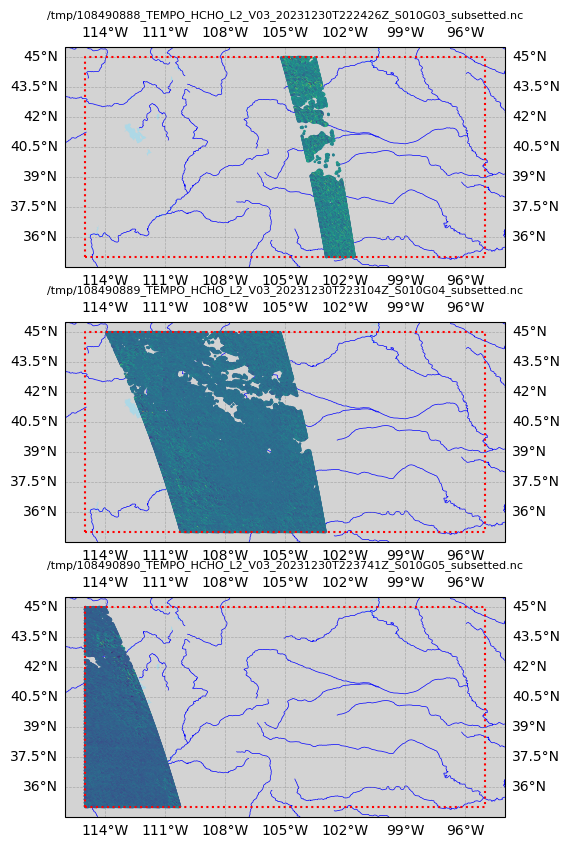

In [ ]:
# Visualize each data file
fig, axs = plt.subplots(
    nrows=len(datatree_dict),
    sharex=True,
    figsize=(7, 10),
    gridspec_kw=dict(hspace=0.25),
    subplot_kw={"projection": data_proj},
)

for i, (key, tree) in enumerate(datatree_dict.items()):
    Var = tree["product/vertical_column"]
    ax = axs[i]
    if np.count_nonzero(~np.isnan(Var.values)) > 0:
        ax = axs[i]
        make_nice_map(ax)

        ax.scatter(
            tree["geolocation/longitude"], tree["geolocation/latitude"], s=1, c=Var, zorder=2
        )

        ax.set_title(key, fontsize=8)

        # Coordinates of rectangle vertices in clockwise order
        xs = [-115, -115, -95, -95, -115]
        ys = [35, 45, 45, 35, 35]
        ax.plot(xs, ys, color="red", linestyle=":")

plt.show()

In [ ]:
import pandas as pd
import xarray as xr
from datatree import DataTree
import glob

In [ ]:
first_key = list(datatree_dict.keys())[0]
tree = datatree_dict[first_key]

# Extract longitude, latitude, and variable
lon = tree["geolocation/longitude"].values.flatten()
lat = tree["geolocation/latitude"].values.flatten()
val = tree["product/vertical_column"].values.flatten()

# Make DataFrame
df = pd.DataFrame({
    "Longitude": lon,
    "Latitude": lat,
    "Vertical_Column": val
})

# Show head
print(df.head())

NameError: name 'datatree_dict' is not defined

In [ ]:
!pip install xarray-datatree


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.8.0
    Uninstalling xarray-2025.8.0:
      Successfully uninstalled xarray-2025.8.0


In [ ]:
import os

# List all files in current working directory
print(os.listdir())


['.config', 'sample_data']


In [ ]:
from google.colab import files

# Upload file from your computer
uploaded = files.upload()

# Check what was uploaded
for fn in uploaded.keys():
    print("Uploaded file:", fn)
